In [77]:
#Importing packages

import pandas as pd
import numpy as np

import pandas_datareader
import datetime

from pandas_datareader import wb

In [145]:
#Cleaning data

countries = ["LDC", "WLD"]


In [147]:
indicators = {"NY.GDP.PCAP.KD":"GDP per capita", "NY.GDP.MKTP.CD":"GDP(current US $)", "SP.DYN.TFRT.IN":"Fertility Rate" }

In [148]:
data_wb = wb.download(indicator= indicators, country= countries, start=1960, end=2016)
data_wb = data_wb.rename(columns = {"NY.GDP.PCAP.KD":"gdp_capita","NY.GDP.MKTP.CD":"gdp", 
                                    "SP.DYN.TFRT.IN":"fert"})
data_wb = data_wb.reset_index()
data_wb.head(-10)

,country,year,gdp_capita,gdp,fert
0,Least developed countries: UN classification,2016,905.908217,9.613860e+11,4.115285
1,Least developed countries: UN classification,2015,894.226141,9.598270e+11,4.172286
2,Least developed countries: UN classification,2014,878.255950,9.697405e+11,4.230570
3,Least developed countries: UN classification,2013,852.671677,8.930320e+11,4.290745
4,Least developed countries: UN classification,2012,826.334484,8.237088e+11,4.353218
5,Least developed countries: UN classification,2011,798.303701,7.705562e+11,4.418358
6,Least developed countries: UN classification,2010,786.144072,6.672728e+11,4.486034
7,Least developed countries: UN classification,2009,757.678503,5.824896e+11,4.554102
8,Least developed countries: UN classification,2008,741.659777,5.807087e+11,4.624399
9,Least developed countries: UN classification,2007,708.559519,4.678180e+11,4.696174


In [149]:
# plot
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets

In [150]:
country=data_wb["country"]
year=data_wb["year"]
gdp_capita=data_wb["gdp_capita"]
fert = data_wb["fert"]

In [152]:
def interactive_figure(country, data_wb):
    """define an interactive figure that uses countries and the dataframe as inputs """
    
    data_country = data_wb[data_wb.country == country]
    year = data_country.year
    gdp_capita = data_country.gdp_capita
    
    fig = plt.figure(dpi=100)
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(year, gdp_capita, 'b')
    ax1.set_ylabel("GDP per Capita", color='b')
    
    ax2 = ax1.twinx()
    ax2.plot(year, fert, 'r')
    ax2.set_ylabel("Fertility rate", color='r')
    
    
    plt.xticks(np.arange(10, 56, 10))
    plt.xticks(rotation=90)
    fig.tight_layout()
    plt.gca().invert_xaxis()

interactive(children=(Dropdown(description='Country', options=('Least developed countries: UN classification',…

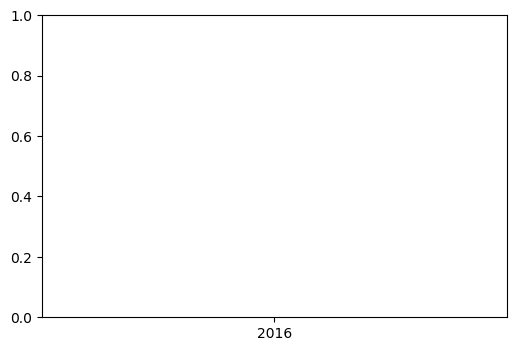

In [153]:
widgets.interact(interactive_figure,
    year = widgets.fixed(year),
    data_wb = widgets.fixed(data_wb),
    country=widgets.Dropdown(description="Country", options=data_wb.country.unique()),
    gdp_capita=widgets.fixed(gdp_capita), fert = widgets.fixed(fert)
    
);